Meriam GAIED & Sofiene KAMMOUN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as L
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from keras.models import load_model
from keras.datasets import mnist

# **Build the autoencoder**

In [ ]:
def build_deep_autoencoder(img_shape, code_size):
    H, W, C = img_shape

    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    decoder.add(L.Dense(2*2*256))
    decoder.add(L.Reshape((2, 2, 256)))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))

    return encoder, decoder

# **Load Dataset**

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0




11490434/11490434 [==============================] - 1s 0us/step


# **Show random images from train**

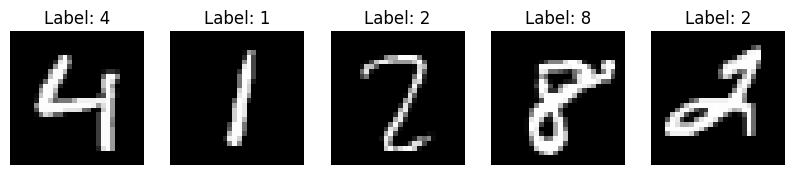

In [ ]:
# Display random images
num_images_to_display = 5
random_indices = np.random.choice(len(x_train), num_images_to_display)

plt.figure(figsize=(10, 2))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_images_to_display, i)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.show()


# **Compile the model**

In [ ]:
img_shape = (28, 28, 1)
code_size = 256

encoder, decoder = build_deep_autoencoder(img_shape, code_size)
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Get descriptors for all images in the train**

In [ ]:
images = x_train

descriptors = autoencoder.layers[0].predict(images)

print("Descriptors shape:", descriptors.shape)



1875/1875 [==============================] - 37s 19ms/step
Descriptors shape: (60000, 256)


# **Image Search**


Define Distance metric using the Nearest Neighbors Technique

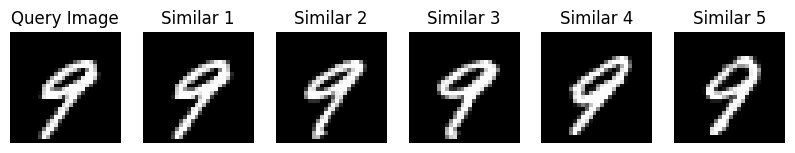

In [ ]:
from sklearn.neighbors import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean")

nei_clf.fit(descriptors)


# Choose a random image as the query image
query_index = np.random.randint(len(descriptors))
query_descriptor = descriptors[query_index].reshape(1, -1)
distances, indices = nei_clf.kneighbors(query_descriptor)


################################################Get and Show similar images############################################################


# Find nearest neighbors
distances, indices = nei_clf.kneighbors(query_descriptor)

# Display query image
plt.figure(figsize=(10, 3))
plt.subplot(1, 6, 1)
plt.imshow(x_train[query_index], cmap='gray')
plt.title("Query Image")
plt.axis('off')

# Display similar images
for i in range(5):
    plt.subplot(1, 6, i + 2)
    similar_index = indices[0, i]
    plt.imshow(x_train[similar_index], cmap='gray')
    plt.title(f"Similar {i + 1}")
    plt.axis('off')

plt.show()